In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.linalg import eigh 
import numpy as np 
from sklearn.decomposition import PCA 

In [ ]:
df = pd.read_csv('prices.csv' )
df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
mask = df['date'].apply(lambda x: x[:4] == '2016') 
df = df[mask] 


In [ ]:
def load_shares():
    prices_df = pd.read_csv('prices.csv')
    securities = pd.read_csv('securities.csv')
    symbols = []
    sectors = []
    prices = []
    i = 0
    for s in pd.unique(prices_df['symbol']):
        stocks = prices_df[prices_df['symbol'] == s]
        stocks_2016 = stocks[stocks['date'].apply(lambda x: x[: 4] == '2016')]
        ## there were 252 days in 2016 when the stock exchange was open
        if len(stocks_2016) == 252:
            symbols.append(s)
            sectors.append(list(securities[securities['Ticker symbol'] == s]['GICS Sector'])[0])
            prices.append(stocks_2016['close'])
    return symbols, np.vstack(prices), sectors

In [ ]:
def pca_project(X, k):
    sum_samples = 0
    for sample in X:
        sum_samples = sum_samples + sample
    avg_sample = sum_samples / X.shape[0]
    centered_list = []
    for sample in X:
        centered_list.append(sample - avg_sample)
    centered_matrix = np.vstack(centered_list)
    Uk = np.linalg.svd(centered_matrix, compute_uv=True)[2][:k]
    Uk[1] = -1 * Uk[1]
    proj = centered_matrix @ Uk.T
    return proj

In [45]:
def plot_sectors(data_set, labels, present_labels):
   for l in range(len(present_labels)):
        x = []
        y = []
        for i in range(data_set.shape[0]):
            if labels[i] == present_labels[l]:
                x.append(data_set[i][0])
                y.append(data_set[i][1])
        plt.scatter(x, y, color=np.random.rand(3,), label=present_labels[l],alpha= 0.5)
   plt.legend()
   plt.show() 

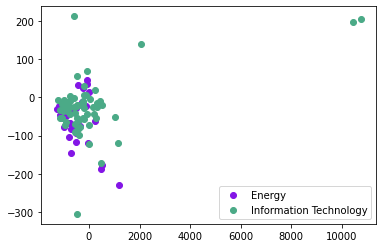

In [21]:
symbols, prices, sectors = load_shares()
proj = pca_project(prices, 2) 
plot_sectors(proj, sectors, ["Energy", "Information Technology"]) 

In [ ]:
def ln_matrix(X): 
   ln_matrix = np.zeros((X.shape[0], X.shape[1])) 
   for price in range(X.shape[0]): 
       for day in range(X.shape[1]-1): 
           ln_matrix[price, day] = np.log(X[price, day + 1]) - np.log(X[price, day]) 
   return ln_matrix 

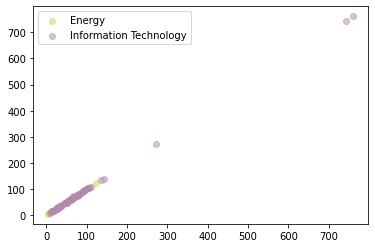

In [48]:
plot_sectors(prices, sectors, ["Energy", "Information Technology"]) 

This graph is not informative and therefore we will perform transformation and use pca onto 2 variables to get information from the data

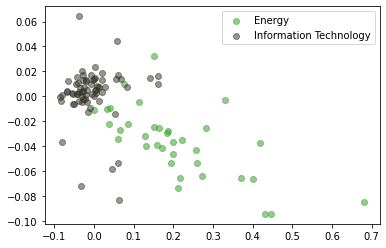

In [49]:
ln_price_matrix = ln_matrix(prices) 
ln_proj = pca_project(ln_price_matrix, 2) 
plot_sectors(ln_proj, sectors, ["Energy", "Information Technology"]) 

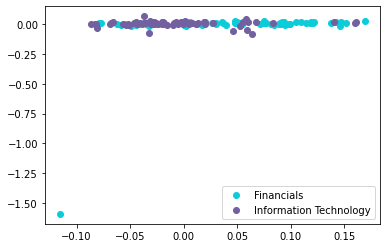

In [23]:
plot_sectors(ln_proj, sectors, ["Financials","Information Technology"]) 

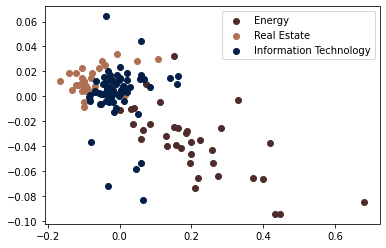

In [24]:
plot_sectors(ln_proj, sectors, ["Energy", "Real Estate","Information Technology"]) 

In the previous section we performed a normalized transformation on the prices so that the new matrix contains the normalized prices. Therefore using the new matrix we can see the changes in the trends.
According to the graphs it can be seen that economics and information technology have similar if not identical trends because the points are very close to each other and from this we will conclude that the trend is similar accordingly and therefore not worth investing in at the same time. While in real estate energy and information technology the trends are different and therefore investing in them will constitute a good diversification

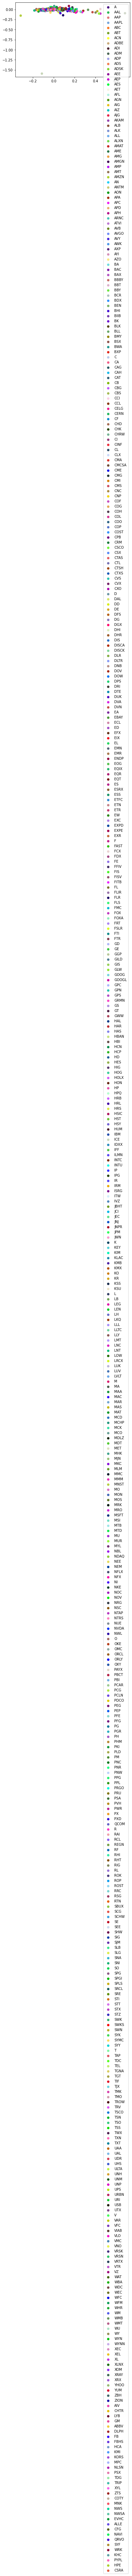

In [25]:
# plot all stocks in order to find an outlier
plot_sectors(ln_proj, symbols, list(pd.Series(symbols).unique())) 

In [38]:
## in this part we find the outlier stock
tuples = [(i,ln_proj[i][1]) for i in range(len(ln_proj))]
sort = sorted(tuples,key=lambda x:x[1])
print('The outlier is ' + symbols[sort[0][0]] + ' in '+str(sort[0][0]))


The outlier is ICE in 220


After finding the point with the lowest value(ICE) we compare it with any stock (we chose the stock in the second place at random). It can be seen from the comparison that towards the time of closing the stock value is dramatically declining, this change will cause the change log to be large and this is reflected even after the data is copied.

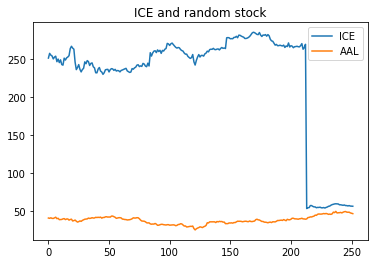

In [37]:
plt.plot(range(252), prices[220], label=symbols[220]) 
plt.plot(range(252), prices[1], label=symbols[1]) 
plt.title("ICE and random stock") 
plt.legend()
plt.show() 